In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
weather_aus =pd.read_csv("weatherAUS.csv")
weather_aus.head()




,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:

weather_aus.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
weather_aus.dropna(axis=0,subset=['RainTomorrow'],inplace=True)
weather_aus.shape

(142193, 23)

In [4]:
features=weather_aus.drop(columns=['RainTomorrow'])
features.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

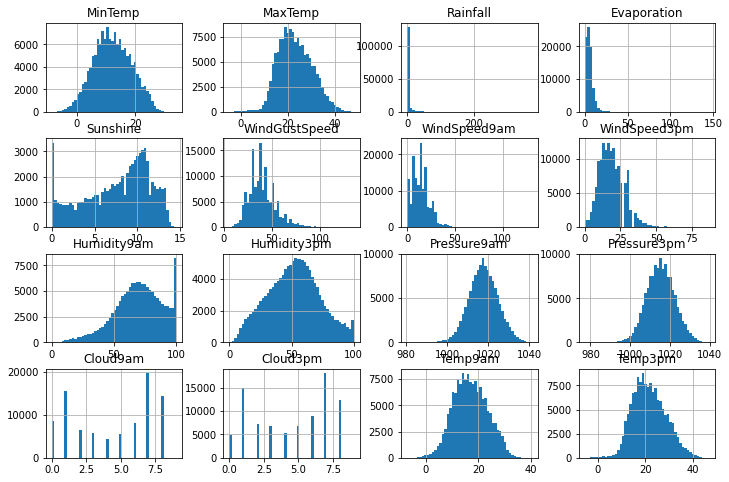

In [5]:
import matplotlib.pyplot as plt 

num_attributes=weather_aus.select_dtypes(np.number)
cat_attributes=weather_aus.select_dtypes('object')
weather_aus.hist(bins=50,figsize=(12,8),column=num_attributes.columns)

In [6]:
cat_attributes

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,E,ESE,E,No,No
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No


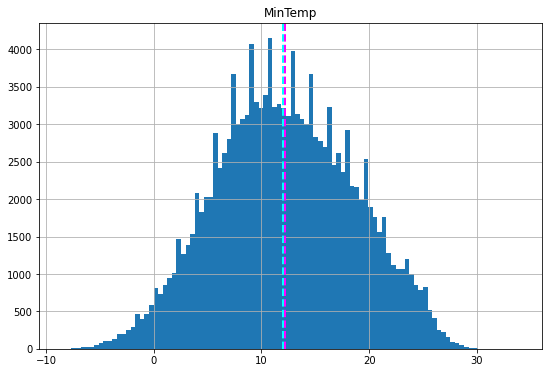

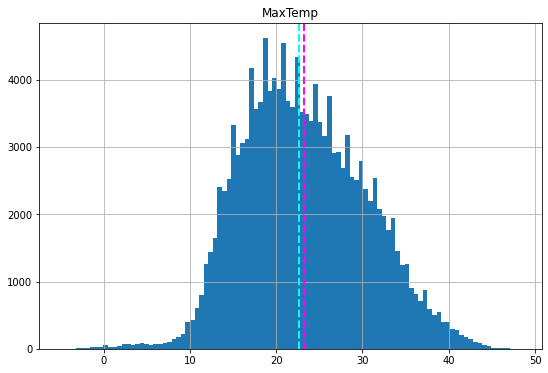

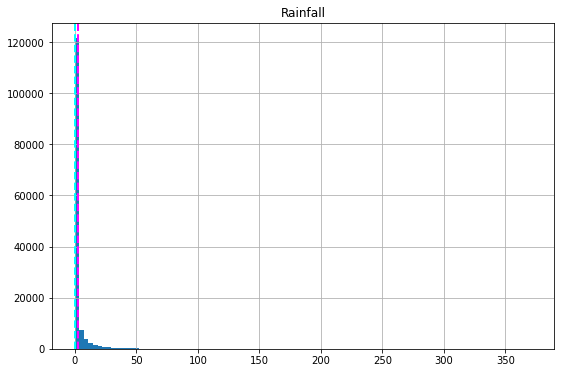

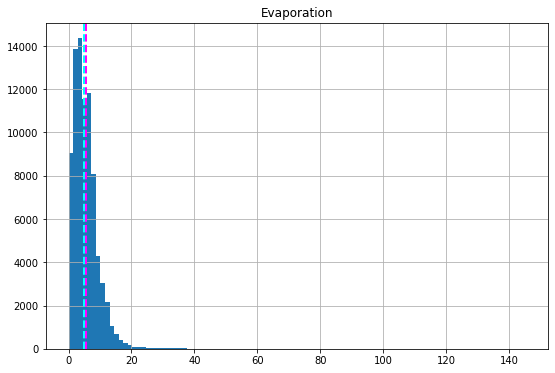

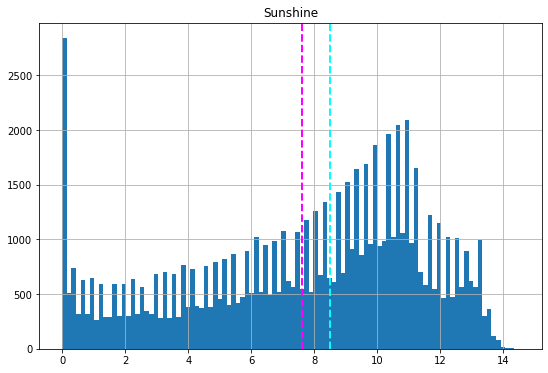

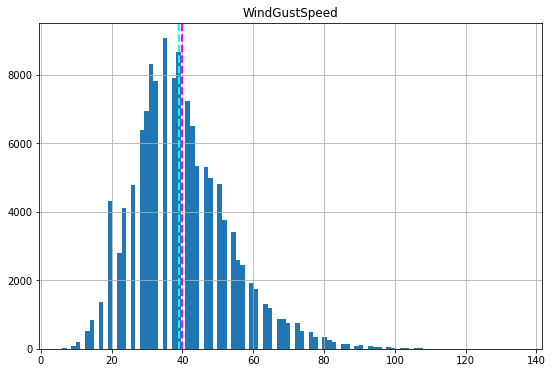

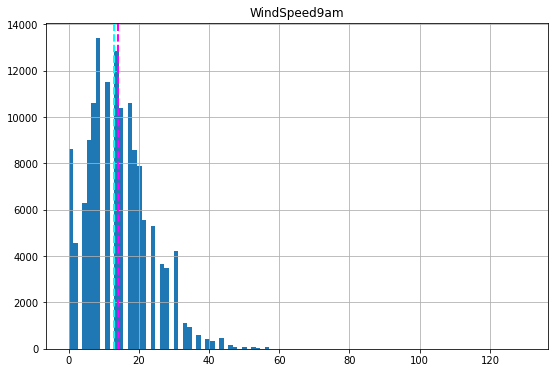

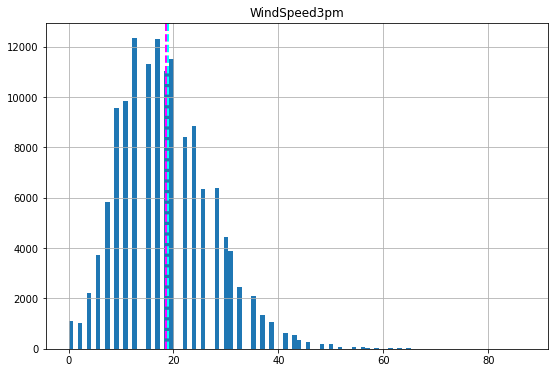

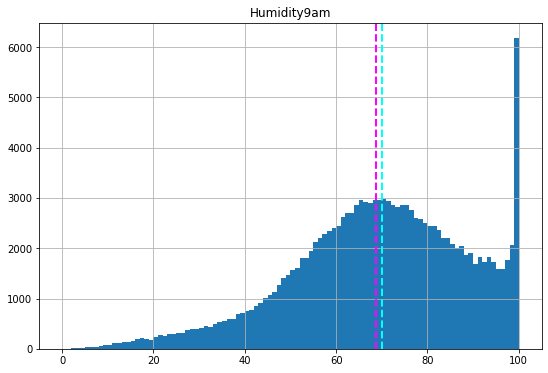

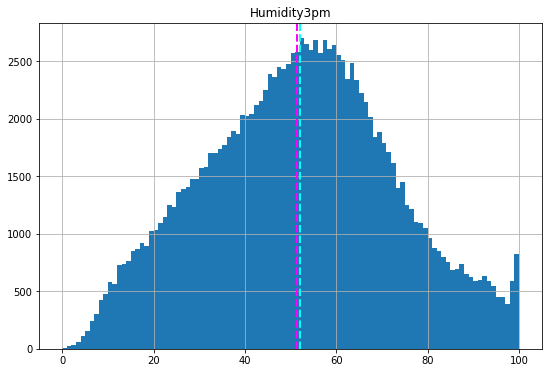

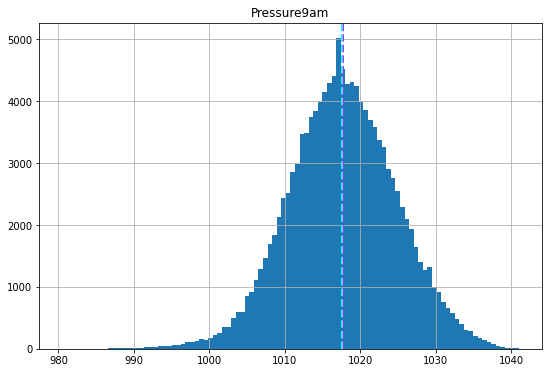

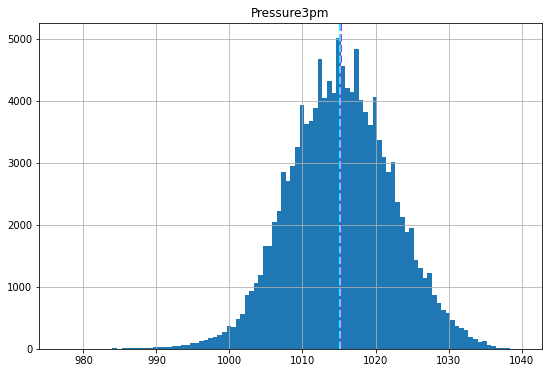

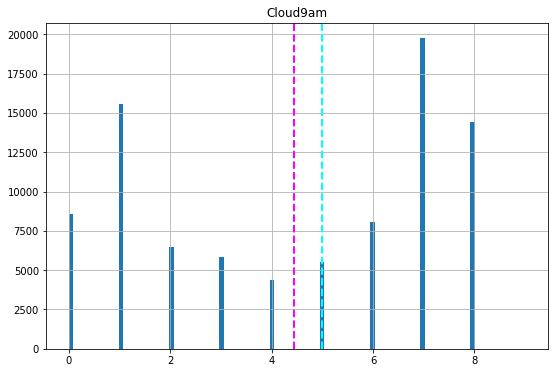

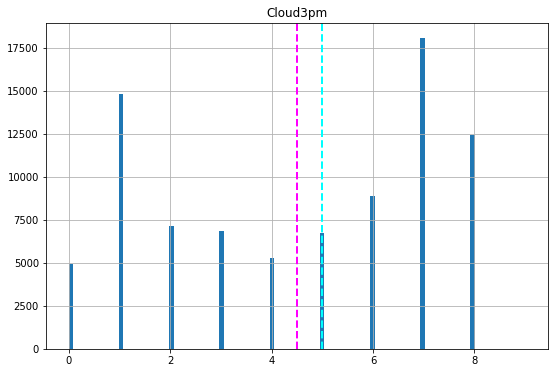

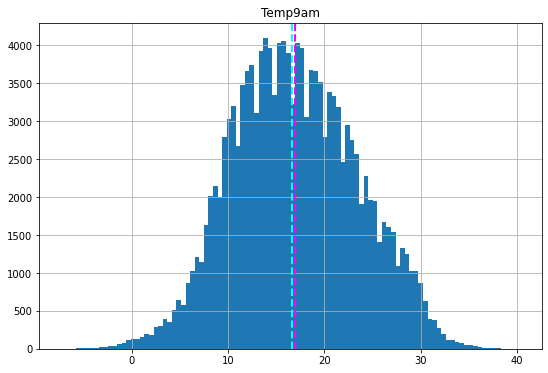

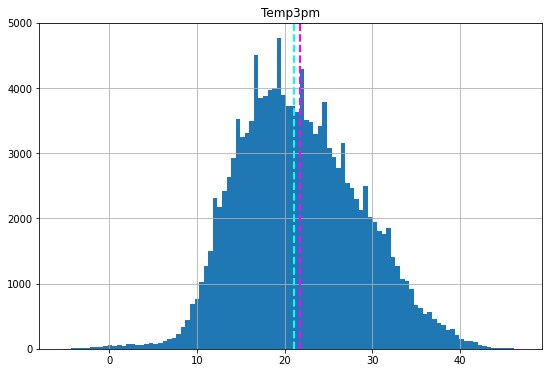

In [7]:
# Plot a histogram for each numeric feature
for col in num_attributes:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = weather_aus[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

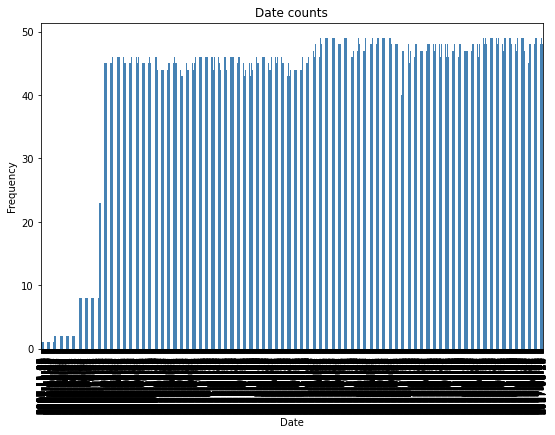

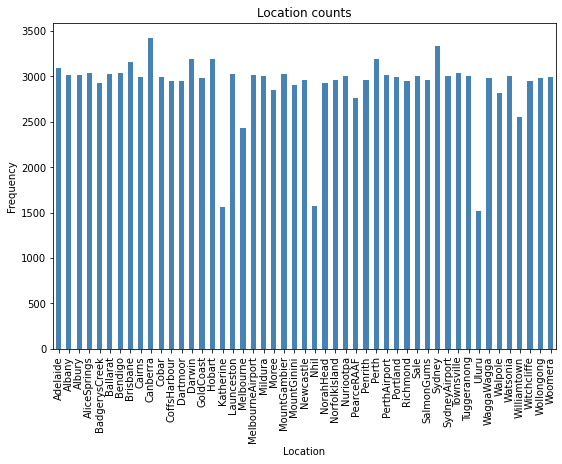

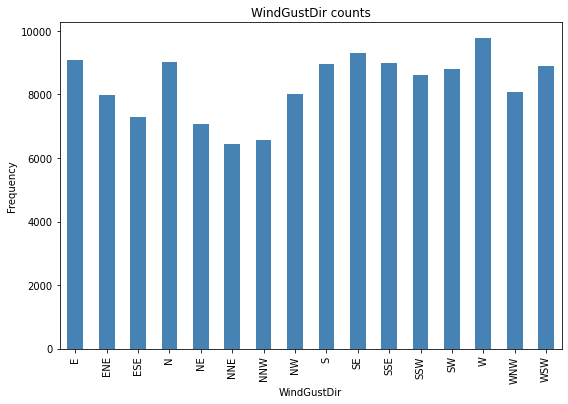

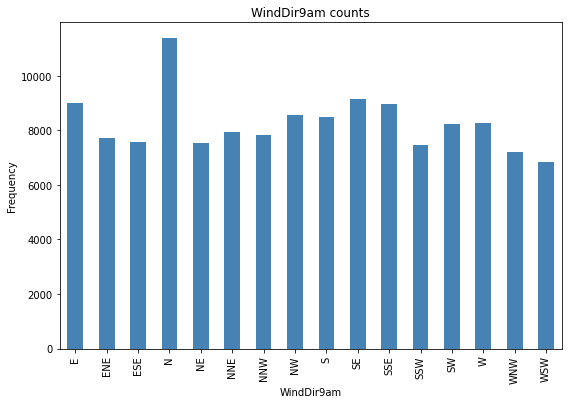

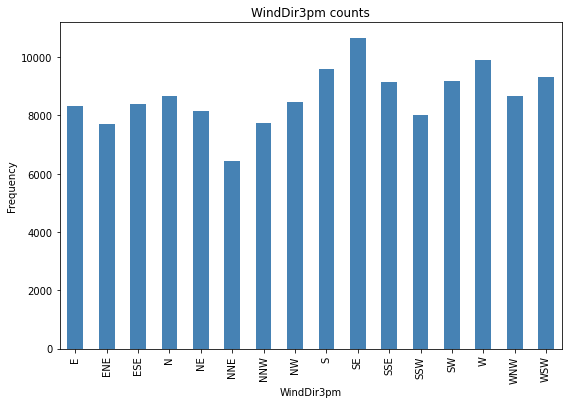

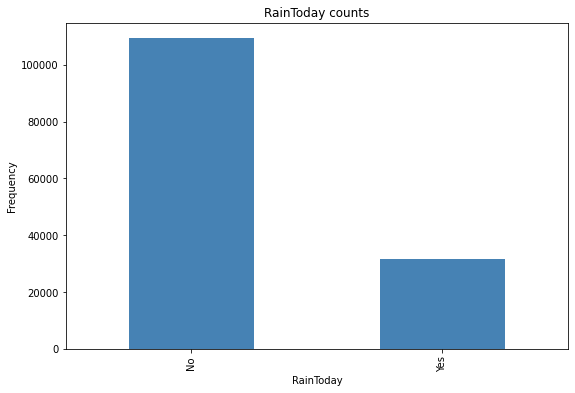

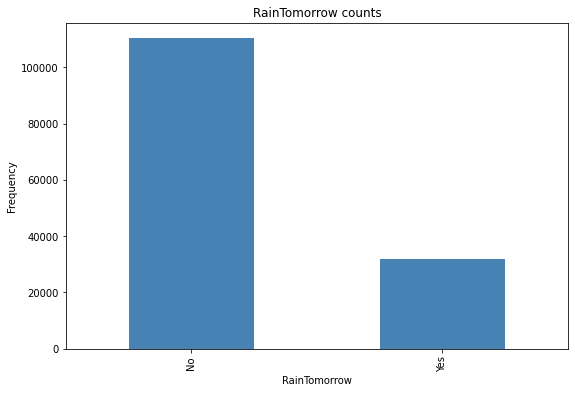

In [8]:
for col in cat_attributes:
    counts = weather_aus[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [9]:
duplication=weather_aus.duplicated().value_counts()
#duplication_sum=data.data.duplicated().sum()
duplication

False    142193
dtype: int64

In [10]:
weather_aus["RainToday"].value_counts()


No     109332
Yes     31455
Name: RainToday, dtype: int64

In [11]:
weather_aus["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [12]:
statistics=weather_aus[num_attributes.columns].describe()

statistics

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


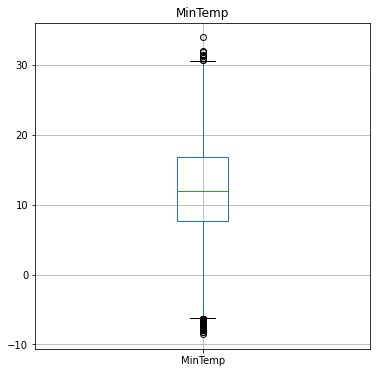

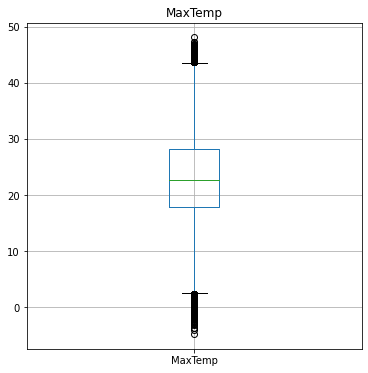

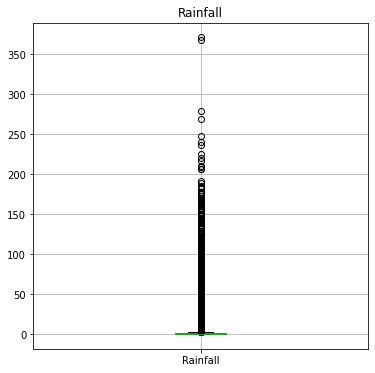

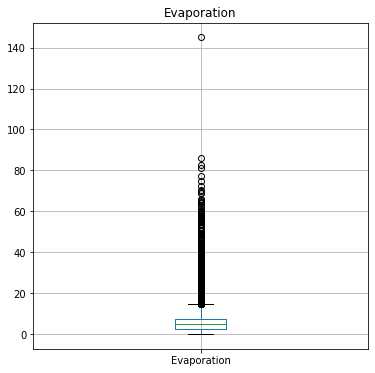

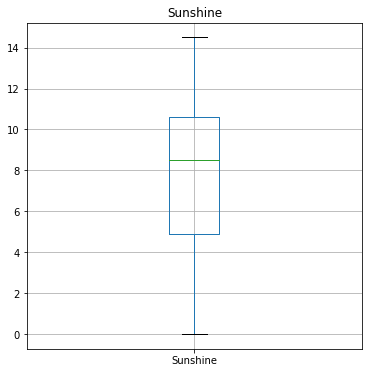

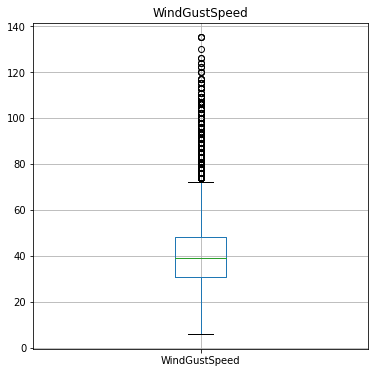

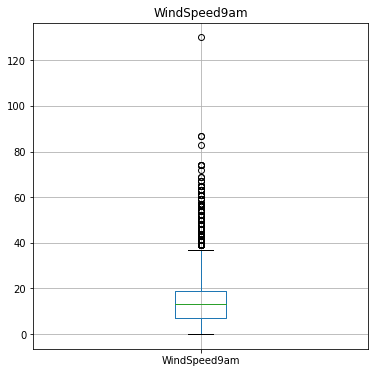

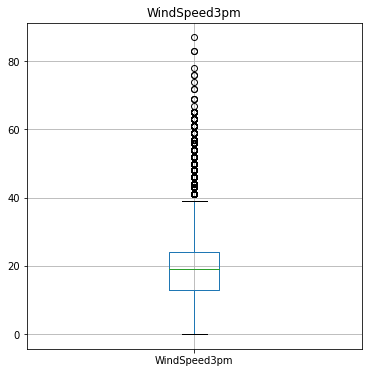

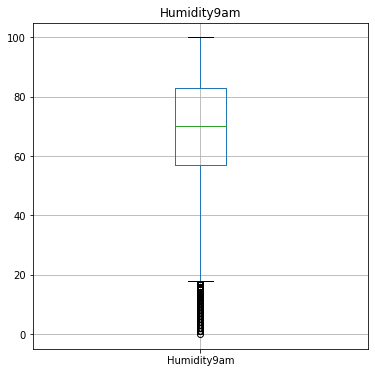

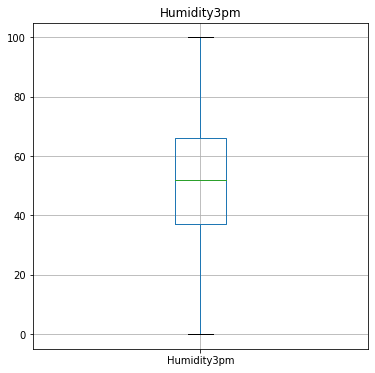

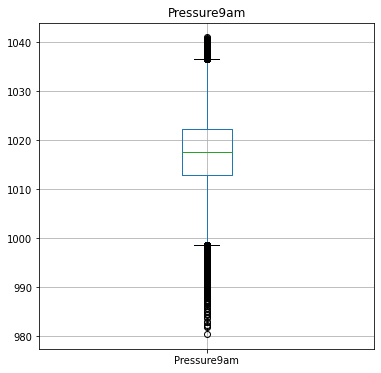

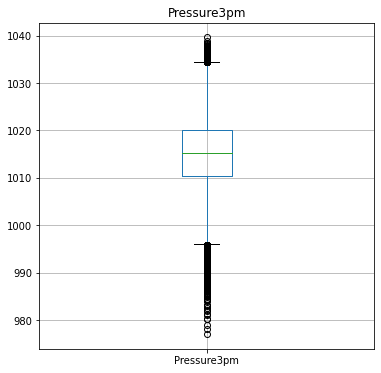

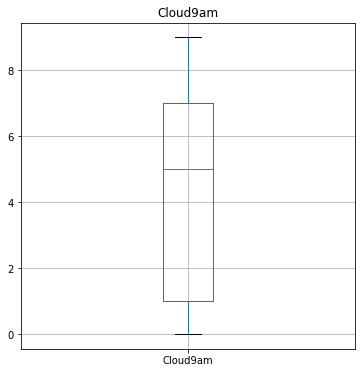

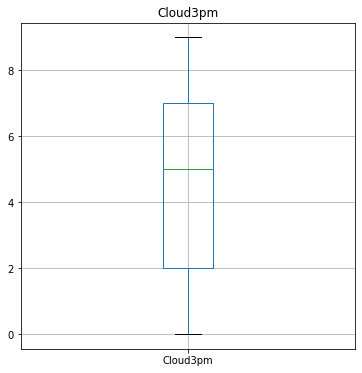

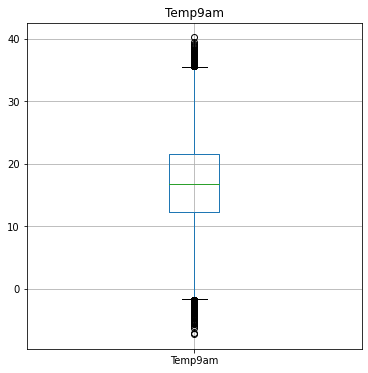

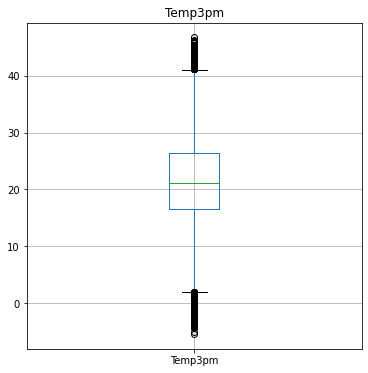

In [13]:
#Check Outliers in numarical features by using boxplot :
from matplotlib import pyplot as plt

type(num_attributes)
for col in num_attributes:
    weather_aus.boxplot(column=col, figsize=(6,6))
    plt.title(col)
    plt.show()

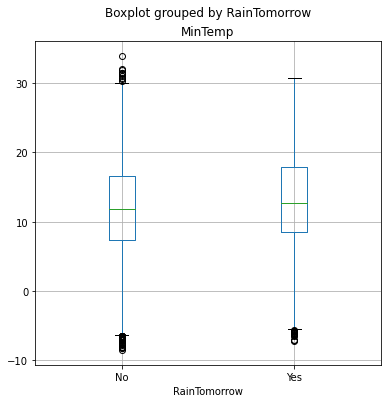

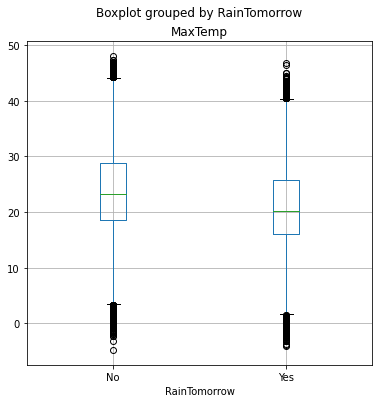

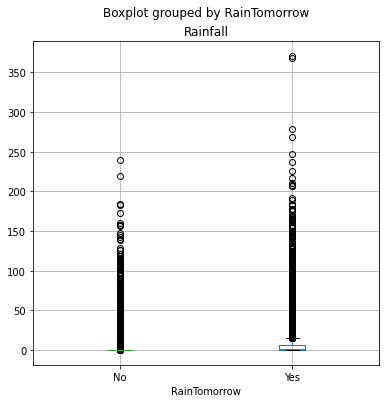

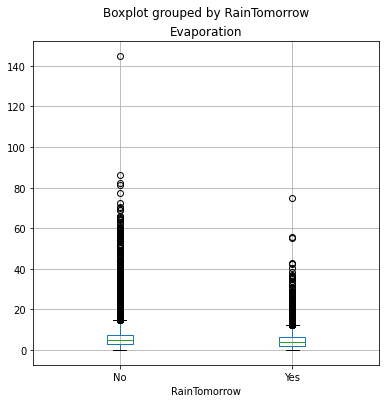

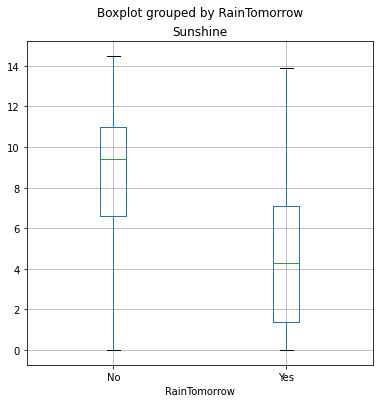

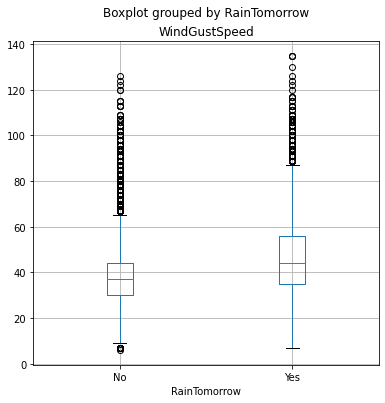

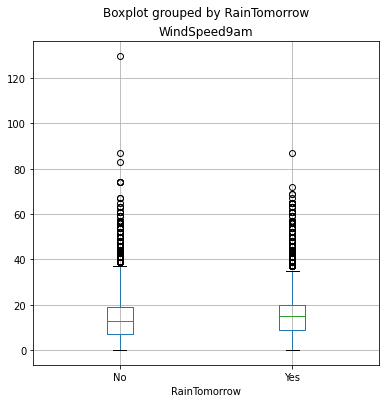

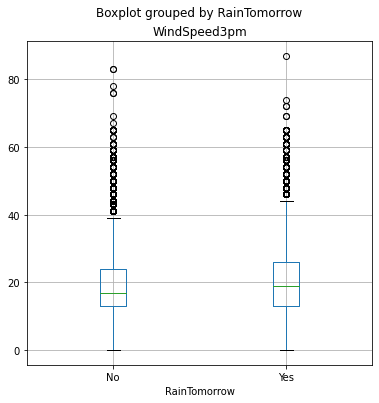

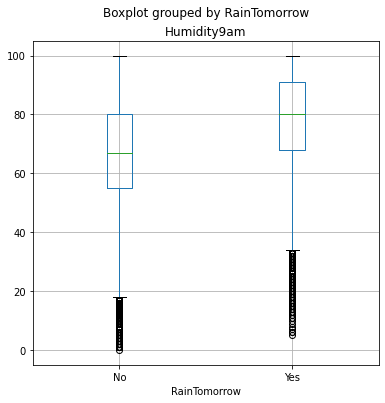

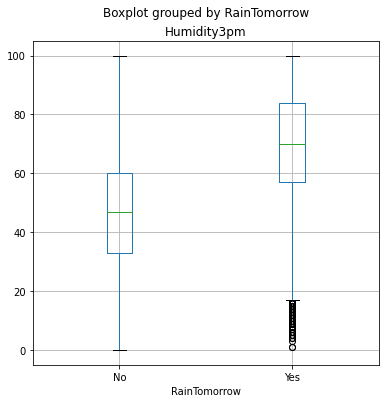

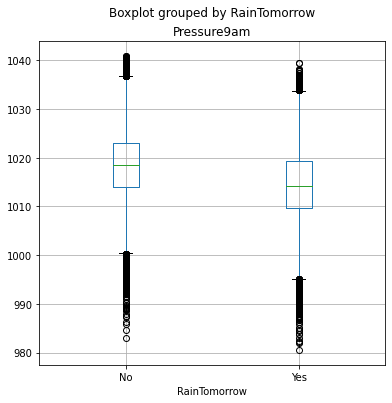

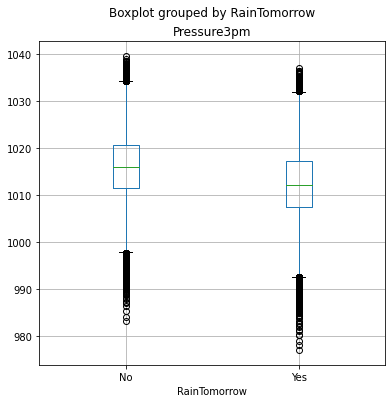

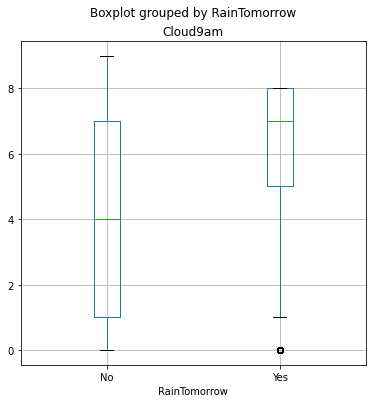

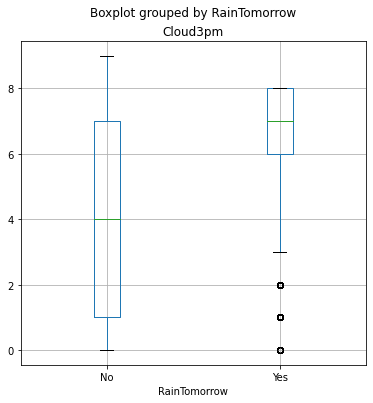

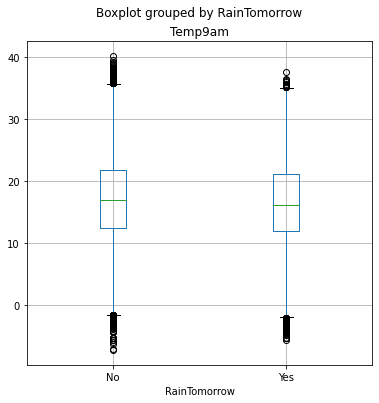

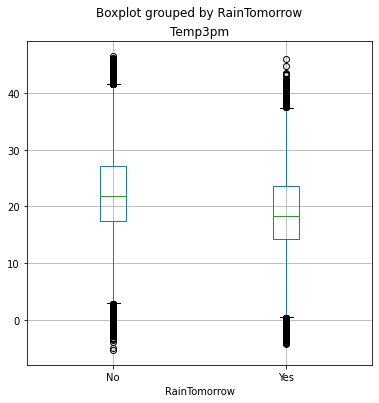

In [14]:
#take insghts for the relation between each categorical feature and the rental counts:
from matplotlib import pyplot as plt
for col in num_attributes:
    weather_aus.boxplot(column=col,by='RainTomorrow', figsize=(6,6))
    plt.title(col)
    plt.show()

In [15]:
X=features
y=weather_aus['RainTomorrow'].copy()
print(X.shape)
print(y.shape)

(142193, 22)
(142193,)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0,shuffle=True,
                                                    stratify=y)


In [17]:
weather_aus[num_attributes.columns].corr()['MaxTemp'].sort_values(ascending=False)

MaxTemp          1.000000
Temp3pm          0.984562
Temp9am          0.887020
MinTemp          0.736267
Evaporation      0.588915
Sunshine         0.469967
WindGustSpeed    0.067690
WindSpeed3pm     0.050800
WindSpeed9am     0.014680
Rainfall        -0.074839
Cloud3pm        -0.279053
Cloud9am        -0.289865
Pressure9am     -0.332293
Pressure3pm     -0.427279
Humidity9am     -0.505432
Humidity3pm     -0.509270
Name: MaxTemp, dtype: float64

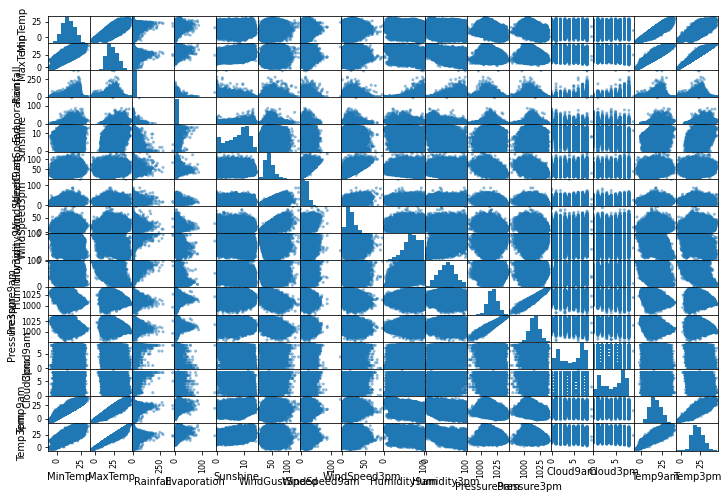

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(weather_aus[num_attributes.columns],figsize=(12,8))
plt.show()


In [19]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,cross_val_predict
import numpy as np
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import FunctionTransformer


train_results=[] 
test_results=[]
confidence_intervals=[]
clf={
    'LogisticRegression': LogisticRegression(random_state=42,max_iter=50000),
    'GradientBoostingClassifier':GradientBoostingClassifier(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier':RandomForestClassifier(random_state=42),
    'LinearSVC':LinearSVC(max_iter=50000,random_state=42),
    'SVC':  SVC(max_iter=50000)
    }


num_pipline=make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
cat_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())


preprocessing=ColumnTransformer([('num', num_pipline, list(num_attributes.columns)),
                                ('cat',cat_pipeline,list(cat_attributes.columns.drop('RainTomorrow').drop('Date'))),
                               
                                ],
                                remainder='drop')
    
target_hot_encoding = OrdinalEncoder()
hot_encoded_labels = target_hot_encoding.fit_transform(y_train.to_frame())

hot_encoded_test_labels=target_hot_encoding.transform(y_test.to_frame())



In [20]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.compose import TransformedTargetRegressor



for key in clf.keys():

    
    full_pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('clf',clf[key]),
    ])
    #train
    score=cross_val_score(full_pipeline, X_train, hot_encoded_labels.ravel(), scoring="accuracy", cv=10)
    train_prediction=cross_val_predict(full_pipeline,X_train,hot_encoded_labels.ravel(),cv=10)
    train_acc=accuracy_score(y_pred=train_prediction,y_true=hot_encoded_labels.ravel())
    
    train_precision=precision_score(y_true=hot_encoded_labels.ravel(),y_pred=train_prediction)
    train_results.append((key,train_acc,train_precision))

    #test
    test_prediction=cross_val_predict(full_pipeline,X_test,hot_encoded_test_labels.ravel(),cv=10)
    test_acc=accuracy_score(y_pred=test_prediction,y_true=hot_encoded_test_labels.ravel())

    test_precision=precision_score(y_true=hot_encoded_test_labels.ravel(),y_pred=test_prediction)

    test_results.append((key,test_acc,test_precision))



    #confidence intervals:
    #*We* can compute a 95% confidence interval for the test RMSE:
    from scipy import stats

    confidence = 0.95

    errors = score
    
    # extra code – computes a confidence interval again using a z-score
    zscore = stats.norm.ppf((1 + confidence) / 2)
    zmargin = zscore * errors.std(ddof=1) / np.sqrt(len(errors))
    c1,c2 = (errors.mean() - zmargin), (errors.mean() + zmargin)
    #confidence_intervals.append({key: {'c1':c1,'c2':c2,'interval':c2-c1}})
    confidence_intervals.append((key,test_acc.mean(),c1,c2,c2-c1))
    errors

In [ ]:
#results:
print('models train scores:',train_results)
best_trained_model_idx=np.array(train_results)[:,1].argmax()

print('models test scores:',test_results)
best_tested_model_idx=np.array(test_results)[:,1].argmax()


print('best trained model:',train_results[best_trained_model_idx][0],train_results[best_trained_model_idx][1])
print('best tested model:',test_results[best_tested_model_idx][0],test_results[best_tested_model_idx][1])


models train scores: [('LogisticRegression', 0.8476616265635204, 0.728832), ('GradientBoostingClassifier', 0.8496810167277842, 0.7458533975387908), ('KNeighborsClassifier', 0.8366906113427438, 0.694012167787384), ('DecisionTreeClassifier', 0.7895514140754508, 0.5299111636252243), ('RandomForestClassifier', 0.8547546089315317, 0.7730590116077014), ('LinearSVC', 0.8474707389360526, 0.740815775256618), ('SVC', 0.8603908173004471, 0.7895968074858951)]
models test scores: [('LogisticRegression', 0.8475315298419992, 0.7278415015641293), ('GradientBoostingClassifier', 0.8480472595996061, 0.738430583501006), ('KNeighborsClassifier', 0.8318017722349852, 0.6789568345323741), ('DecisionTreeClassifier', 0.7840498851329176, 0.5180129323616955), ('RandomForestClassifier', 0.8510947536218294, 0.7644539614561028), ('LinearSVC', 0.8470158000843921, 0.7378230227094753), ('SVC', 0.8555487833466173, 0.7775420270931941)]
best trained model: DecisionTreeClassifier 0.7895514140754508
best tested model: Decis

In [ ]:
train_result=pd.DataFrame(train_results,
           columns=['Model','accuracy','precision']).sort_values(by='accuracy')

train_result


,Model,accuracy,precision
3,DecisionTreeClassifier,0.789551,0.529911
2,KNeighborsClassifier,0.836691,0.694012
5,LinearSVC,0.847471,0.740816
0,LogisticRegression,0.847662,0.728832
1,GradientBoostingClassifier,0.849681,0.745853
4,RandomForestClassifier,0.854755,0.773059
6,SVC,0.860391,0.789597


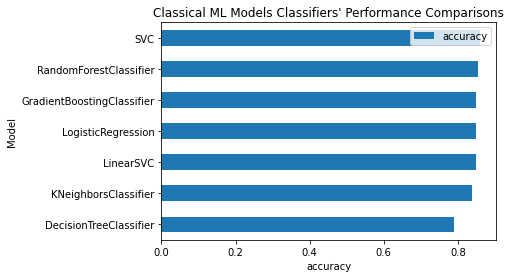

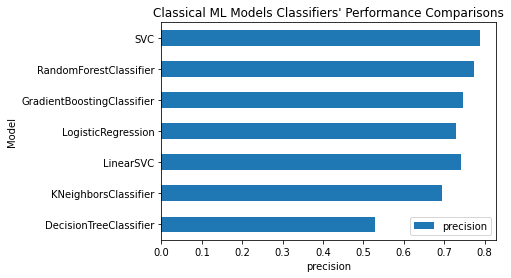

In [ ]:
#plt.figure(figsize=(10, 50))
#result.plot.barh(x='Model',subplots=True,sharex=False)
#plt.show()


for score in ['accuracy','precision']:
    train_result.plot.barh(x='Model',y=score,sharex=False)
    plt.xlabel(score)
    plt.title('Classical ML Models Classifiers\' Performance Comparisons')
    plt.show()

In [ ]:
test_result=pd.DataFrame(test_results,
           columns=['Model','accuracy','precision']).sort_values(by='accuracy')



test_result


,Model,accuracy,precision
3,DecisionTreeClassifier,0.784050,0.518013
2,KNeighborsClassifier,0.831802,0.678957
5,LinearSVC,0.847016,0.737823
0,LogisticRegression,0.847532,0.727842
1,GradientBoostingClassifier,0.848047,0.738431
4,RandomForestClassifier,0.851095,0.764454
6,SVC,0.855549,0.777542


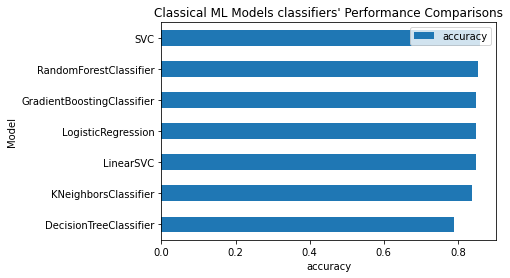

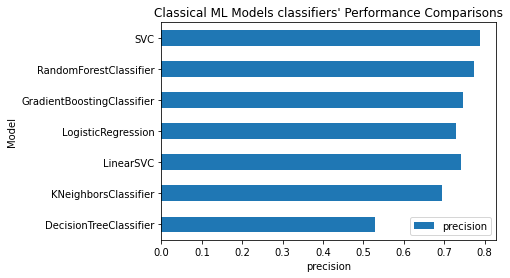

In [ ]:

for score in ['accuracy','precision']:
    train_result.plot.barh(x='Model',y=score,sharex=False)
    plt.xlabel(score)
    plt.title('Classical ML Models classifiers\' Performance Comparisons')
    plt.show()

In [ ]:
confidence_interval_results=pd.DataFrame(confidence_intervals,
           columns=['Model','Accuracy','C1','C2','Confidence Interval']).sort_values(by='C1',ignore_index=True)



confidence_interval_results


In [ ]:
plt.xticks(range(len(confidence_interval_results)),list(confidence_interval_results['Model']),
            rotation = 45, ha="right")
plt.title('Confidence Interval')
for c1,c2,b in zip(confidence_interval_results['C1'],confidence_interval_results['C2'],
                    range(len(confidence_interval_results))):
    color='#2187bb'
    horizontal_line_width=0.25
    left = b - horizontal_line_width / 2
    right = b + horizontal_line_width / 2
    #plt.plot((b,b),(c1,c2),'ro-',color='orange')
    plt.plot([b, b], [c2, c1], color=color)
    plt.plot([left, right], [c2, c2], color=color)
    plt.plot([left, right], [c1, c1], color=color)
    plt.plot(b, confidence_interval_results['Accuracy'][b], 'o', color='#f44336')

#plt.xticks(range(len(confidence_interval_results)),list(confidence_interval_results['Model']))
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import randint


full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('LogisticRegression',LogisticRegression(penalty="l2",dual= False,tol=0.0001,C= 1,
    fit_intercept=True, intercept_scaling= 1, class_weight= None, random_state = None, 
    solver= "lbfgs",max_iter = 10000,multi_class= "auto",verbose= 0,warm_start = False,
    n_jobs = -1, l1_ratio= None))
                        ])

                     
param_grid=[{ 
                'LogisticRegression__C':[.1,1,10],
                'LogisticRegression__tol':[0.0001,0.001,.01],
                'LogisticRegression__class_weight':['balanced'],
                             
            }]
#param=[{ 
#                #'LinearRegression__n_estimators':randint(low=100, high=200),
#                'LinearRegression__min_samples_split':randint(low=2, high=10),
#                'LinearRegression__subsample':np.linspace(start=.1,stop=.9),
#                'LinearRegression__max_features':randint(low=5, high=10),
#                'LinearRegression__alpha':np.linspace(start=0.0001,stop=.1),
#                
#            }]
#grid_search=RandomizedSearchCV(full_pipeline,param,cv=10,scoring='neg_root_mean_squared_error',random_state=42,verbose=1)

grid_search=GridSearchCV(full_pipeline,param_grid,cv=10,scoring='accuracy',verbose=1)


In [ ]:
grid_search.fit(X_train,y_train)
print('best score=',grid_search.best_score_)
accuracy=cross_val_score(grid_search.best_estimator_,X_train,hot_encoded_labels.ravel(),
                          scoring='accuracy',cv=10)
accuracy_percentage=accuracy.mean()
print('accuracy percentage:',accuracy_percentage)
print(grid_search.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
best score= 0.7940322025070978
accuracy percentage: 0.7940322025070978
{'LogisticRegression__C': 1, 'LogisticRegression__class_weight': 'balanced', 'LogisticRegression__tol': 0.0001}


In [ ]:
print('best score=',grid_search.best_score_)
accuracy=cross_val_score(full_pipeline,X_train,hot_encoded_labels.ravel(),scoring='accuracy',cv=10)
accuracy.mean()
accuracy_percentage=accuracy.mean()
print('accuracy percentage:',accuracy_percentage)
print(grid_search.best_params_)

best score= 0.7940322025070978
accuracy percentage: 0.8476616317306167
{'LogisticRegression__C': 1, 'LogisticRegression__class_weight': 'balanced', 'LogisticRegression__tol': 0.0001}


In [ ]:
best_params=grid_search.best_params_
LR_best_param=pd.DataFrame.from_dict(grid_search.best_params_,orient='index',columns=['best value'])
LR_best_param['best value']


LR_best_param



,best value
LogisticRegression__C,1
LogisticRegression__class_weight,balanced
LogisticRegression__tol,0.0001


In [ ]:
from sklearn.metrics import accuracy_score

final_model=grid_search.best_estimator_
final_prediction=final_model.predict(X_test)
final_accuracy=accuracy_score(y_pred=final_prediction,y_true=y_test)
final_accuracy_percentage=final_accuracy
print('final accuracy percentage:',final_accuracy_percentage)
#train the best model in the whole data set including the train and test datat set.


final accuracy percentage: 0.7954428243236907


In [ ]:
#Save the final Model:
import joblib

joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_accuracy_scores, valid_accuracy_scores = learning_curve(
    final_model, X_train, hot_encoded_labels.ravel(), train_sizes=np.linspace(0.01, 1, 456), cv=10,
    scoring="accuracy",random_state=42)
train_accuracy_errors = train_accuracy_scores.mean(axis=1)
valid_accuracy_errors = valid_accuracy_scores.mean(axis=1)


#valid_errors

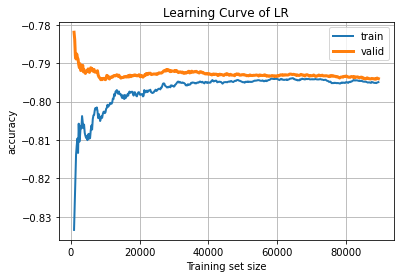

In [ ]:
train_accuracy_errors = train_accuracy_scores.mean(axis=1)
valid_accuracy_errors = valid_accuracy_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_accuracy_errors, linewidth=2, label="train")
plt.plot(train_sizes, valid_accuracy_errors, linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.title("Learning Curve of LR")
plt.xlabel("Training set size")
plt.ylabel("accuracy")
plt.grid()
plt.legend(loc="upper right")
#plt.axis([400, 700, 0, .3])
plt.show()

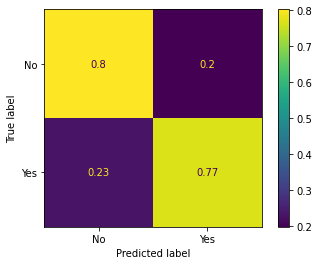

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_predict=final_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_predict,normalize='true')
plt.show()


In [ ]:
from scipy import stats
confidence = 0.95

errors = accuracy

zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * errors.std(ddof=1) / np.sqrt(len(errors))
final_c1,final_c2=(errors.mean() - zmargin, errors.mean()+ zmargin)
final_confidence_interval=final_c2-final_c1
final_c1,final_c2

(0.84541812275789, 0.8499051407033434)

In [ ]:
# Use SMOTEENN for oversampling in regression problem
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
upsample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

In [ ]:
num_pipline=make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
cat_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())


preprocessing=ColumnTransformer([('num', num_pipline, list(num_attributes.columns)),
                                ('cat',cat_pipeline,list(cat_attributes.columns.drop('RainTomorrow').drop('Date'))),
                               
                                ],
                                remainder='drop')
    
target_hot_encoding = OrdinalEncoder()
hot_encoded_labels = target_hot_encoding.fit_transform(y_train.to_frame())

hot_encoded_test_labels=target_hot_encoding.transform(y_test.to_frame())

hot_encoded_labels.ravel().shape

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor


smote_full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('upsampling',upsample),
    ('LogisticRegression',LogisticRegression(penalty="l2",dual= False,tol=0.0001,C= 1,
    fit_intercept=True, intercept_scaling= 1, class_weight= None, random_state = None, 
    solver= "lbfgs",max_iter = 10000,multi_class= "auto",verbose= 0,warm_start = False,
    n_jobs = -1, l1_ratio= None))
                        ])

                     
smote_param_grid=[{ 
                'LogisticRegression__C':[.1,1,10],
                'LogisticRegression__tol':[0.0001,0.001,.01],
                'LogisticRegression__class_weight':['balanced'],
                             
            }]

smote_grid_search=GridSearchCV(smote_full_pipeline,smote_param_grid,cv=10,scoring='accuracy',verbose=1)


In [ ]:
smote_grid_search.fit(X_train,y_train)
print('best score=',smote_grid_search.best_score_)
smote_accuracy=cross_val_score(smote_grid_search.best_estimator_,X_train,hot_encoded_labels.ravel(),
                          scoring='accuracy',cv=10)
smote_accuracy_percentage=smote_accuracy.mean()
print('accuracy percentage:',smote_accuracy_percentage)
print(smote_grid_search.best_params_)

In [ ]:
from sklearn.metrics import accuracy_score

final_smote_grid_model=smote_grid_search.best_estimator_
final_smote_grid_prediction=final_smote_grid_model.predict(X_test)
final_smote_grid_acc=accuracy_score(y_pred=final_smote_grid_prediction,y_true=y_test)
final_smote_grid_acc_percentage=final_smote_grid_acc.round(1)
print('final acc percentage:',final_smote_grid_acc_percentage)
#train the best model in the whole data set including the train and test datat set.


NameError: name 'smote_grid_search' is not defined

In [ ]:
#*We* can compute a 95% confidence interval for the test RMSE:
from scipy import stats

confidence = 0.95
errors = final_smote_grid_acc
np.sqrt(stats.t.interval(confidence, len(errors) - 1,
                         loc=errors.mean(),
                         scale=stats.sem(errors)))

In [ ]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * errors.std(ddof=1) / np.sqrt(len(errors))
final_rnd_c1,final_rnd_c2=errors.mean() - zmargin, errors.mean() + zmargin
final_smote_grid_confidence_interval=final_rnd_c2-final_rnd_c1


In [ ]:
A_B_testing=[('GBR_With_SMOTE',final_smote_grid_acc,final_rnd_c1,final_rnd_c2,
                final_smote_grid_confidence_interval),('GBR_Without_SMOTE',final_accuracy,
                final_c1,final_c2,final_confidence_interval)]




In [ ]:
A_B_testing_results=pd.DataFrame(A_B_testing,
           columns=['Model','Accuracy','C1','C2','Confidence Interval']).sort_values(by='Accuracy',
           ignore_index=True)
A_B_testing_results

In [ ]:
confidence_interval_testing=A_B_testing_results[['Model','C1','C2','Confidence Interval']]


In [ ]:
plt.xticks(range(len(confidence_interval_testing)),list(confidence_interval_testing['Model']),rotation = 45,
                    ha="right")
plt.title('A-B Systems\' Confidence Intervals testing')
for c1,c2,b in zip(confidence_interval_testing['C1'],confidence_interval_testing['C2'],
                   range(len(confidence_interval_testing))):
    color='#2187bb'
    horizontal_line_width=.1
    left = b - horizontal_line_width / 2
    right = b + horizontal_line_width / 2
    #plt.plot((b,b),(c1,c2),'ro-',color='orange')
    plt.plot([b, b], [c2, c1], color=color)
    plt.plot([left, right], [c2, c2], color=color)
    plt.plot([left, right], [c1, c1], color=color)
    plt.plot(b, A_B_testing_results['Accuracy'][b], 'o', color='#f44336')

#plt.xticks(range(len(confidence_interval_results)),list(confidence_interval_results['Model']))
plt.show()